<a href="https://colab.research.google.com/github/albogdan/aps360-project/blob/master/FeatureKernelOnBerend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
from torchsummary import summary
import os
import time

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
if os.path.exists(os.path.expanduser('~/data')):
  !rm -rf {os.path.expanduser('~/data')}
!unzip '/content/drive/My Drive/APS360 Project/share/BerendImages/mayacaptures.zip' -d {os.path.expanduser('~/data')}

In [4]:
# Transform Settings - resize all images to 224 x 224
data_transform = transforms.Compose([transforms.Resize((224,224)), 
                                     transforms.Grayscale(num_output_channels=3),
                                      transforms.ToTensor()])

# define dataloader parameters
num_workers = 4
batch_size = 1

# get dataset
image_set = datasets.ImageFolder(os.path.expanduser('~/data'), transform=data_transform)

# put data inside loader
loader = torch.utils.data.DataLoader(image_set, batch_size=batch_size, 
                                        num_workers=num_workers, shuffle=False)


In [5]:
print(image_set.class_to_idx)
classes = os.listdir(os.path.expanduser('~/data'))
classes.sort()
classes = classes[:]
print(classes)
print(len(classes))

{'11211': 0, '15571': 1, '22388': 2, '2456': 3, '3001': 4, '3003': 5, '3004': 6, '3007': 7, '3008': 8, '3009': 9, '30136': 10, '3039': 11, '3040': 12, '3044c': 13, '3062b': 14, '35464': 15, '3659': 16, '3660': 17, '3665': 18, '3941': 19, '4070': 20, '42023': 21, '4589b': 22, '4727': 23, '4733': 24, '50950': 25, '54200': 26, '6111': 27, '6232': 28, '6249': 29, '6541': 30, '85984': 31, '87081': 32, '87087': 33, '98100': 34}
['11211', '15571', '22388', '2456', '3001', '3003', '3004', '3007', '3008', '3009', '30136', '3039', '3040', '3044c', '3062b', '35464', '3659', '3660', '3665', '3941', '4070', '42023', '4589b', '4727', '4733', '50950', '54200', '6111', '6232', '6249', '6541', '85984', '87081', '87087', '98100']
35


# Getting features

In [6]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [7]:
feature_root_path = os.path.expanduser('~/feature')
for i in classes:
  path = os.path.join(feature_root_path, i)
  if not os.path.exists(path):
    !mkdir -p {path}

In [8]:
# generate and save feature maps
i = 0
for img, label in loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())
  features_folder_path = os.path.join(feature_root_path, classes[label])
  feature_path = os.path.join(features_folder_path, "{}.tensor".format(i))
  torch.save(features_tensor.squeeze(0), feature_path)
  i += 1
  print("saved {} images".format(i))

Streaming output truncated to the last 5000 lines.
saved 23002 images
saved 23003 images
saved 23004 images
saved 23005 images
saved 23006 images
saved 23007 images
saved 23008 images
saved 23009 images
saved 23010 images
saved 23011 images
saved 23012 images
saved 23013 images
saved 23014 images
saved 23015 images
saved 23016 images
saved 23017 images
saved 23018 images
saved 23019 images
saved 23020 images
saved 23021 images
saved 23022 images
saved 23023 images
saved 23024 images
saved 23025 images
saved 23026 images
saved 23027 images
saved 23028 images
saved 23029 images
saved 23030 images
saved 23031 images
saved 23032 images
saved 23033 images
saved 23034 images
saved 23035 images
saved 23036 images
saved 23037 images
saved 23038 images
saved 23039 images
saved 23040 images
saved 23041 images
saved 23042 images
saved 23043 images
saved 23044 images
saved 23045 images
saved 23046 images
saved 23047 images
saved 23048 images
saved 23049 images
saved 23050 images
saved 23051 images

In [9]:
!zip feature.zip -r {feature_root_path}

Streaming output truncated to the last 5000 lines.
  adding: root/feature/15571/1478.tensor (deflated 84%)
  adding: root/feature/15571/1135.tensor (deflated 82%)
  adding: root/feature/15571/1388.tensor (deflated 83%)
  adding: root/feature/15571/1369.tensor (deflated 83%)
  adding: root/feature/15571/1093.tensor (deflated 82%)
  adding: root/feature/15571/871.tensor (deflated 84%)
  adding: root/feature/15571/1381.tensor (deflated 84%)
  adding: root/feature/15571/1584.tensor (deflated 84%)
  adding: root/feature/15571/1265.tensor (deflated 84%)
  adding: root/feature/15571/1307.tensor (deflated 83%)
  adding: root/feature/15571/938.tensor (deflated 83%)
  adding: root/feature/15571/1581.tensor (deflated 84%)
  adding: root/feature/15571/1041.tensor (deflated 84%)
  adding: root/feature/15571/1214.tensor (deflated 84%)
  adding: root/feature/15571/1244.tensor (deflated 84%)
  adding: root/feature/15571/1543.tensor (deflated 82%)
  adding: root/feature/15571/933.tensor (deflated 83%)


# training code

In [10]:
def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def evaluate(model, loader, criterion):
  total_loss = 0.0
  correct = 0
  total = 0
  model.eval()
  with torch.no_grad():
    for i, data in enumerate(loader, 0):
      imgs, labels = data
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      output = model(imgs)

      # select index with maximum prediction score
      pred = output.max(1, keepdim = True)[1]
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
      total_loss += criterion(output, labels).item()
  return 1 - correct/total, total_loss

def plot_training_curve(path):
  """ Plots the training curve for a model run, given the csv files
  containing the train/validation error/loss.

  Args:
      path: The base path of the csv files produced during training
  """
  import matplotlib.pyplot as plt
  train_err = np.loadtxt("{}_train_err.csv".format(path))
  val_err = np.loadtxt("{}_val_err.csv".format(path))
  train_loss = np.loadtxt("{}_train_loss.csv".format(path))
  val_loss = np.loadtxt("{}_val_loss.csv".format(path))
  plt.title("Train vs Validation Error")
  n = len(train_err) # number of epochs
  plt.plot(range(1,n+1), train_err, label="Train")
  plt.plot(range(1,n+1), val_err, label="Validation")
  plt.xlabel("Epoch")
  plt.ylabel("Error")
  plt.legend(loc='best')
  plt.show()
  plt.title("Train vs Validation Loss")
  plt.plot(range(1,n+1), train_loss, label="Train")
  plt.plot(range(1,n+1), val_loss, label="Validation")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(loc='best')
  plt.show()

In [11]:
def transfer_train(model, batch_size = 32, num_epochs = 10, lr = 0.003, wd = 1e-5):
  torch.manual_seed(360)

  train_loader, val_loader, test_loader = feature_loader(feature_root_path, 0.6, 0.2, batch_size)

  # Initialize containers for error and loss
  train_err, train_loss, val_err, val_loss = [], [], [], []

  # set up optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr = lr, 
                                 weight_decay=wd)

  start_time = time.time()

  for epoch in range(num_epochs):
    epoch_total = 0
    epoch_correct = 0
    epoch_loss = 0
    model.train()
    for feature, labels in iter(train_loader):

      # Enable GPU
      if use_cuda and torch.cuda.is_available():
        feature = feature.cuda()
        labels = labels.cuda()
      
      # zero parameter gradients
      optimizer.zero_grad()

      # forward pass, backward pass, and optimize
      out = model(feature)
      loss = criterion(out, labels)
      loss.backward()
      optimizer.step()
      
      # mini batch statistics
      pred = out.max(1, keepdim = True)[1]
      epoch_correct += pred.eq(labels.view_as(pred)).sum().item()
      epoch_total += feature.shape[0]
      epoch_loss += loss.item()
    train_err.append(1 - (epoch_correct / epoch_total))
    train_loss.append(epoch_loss)
    a, b = evaluate(model, val_loader, criterion)
    val_err.append(a)
    val_loss.append(b)
    
    print ("Epoch %d Finished. " % epoch ,"Time per Epoch: % 6.2f s "% ((time.time()-start_time) / (epoch +1)))
    print ("train err: {:.4f}, train loss: {:.4f}".format(train_err[epoch], train_loss[epoch]))
    print ("validation err: {:.4f}, validation loss: {:.4f}".format(a, b))

    # save the current model state
    model_path = get_model_name(model.name, batch_size, lr, epoch)
    torch.save(model.state_dict(), model_path)
  
  print('Finished training in %6.2f s' % (time.time()-start_time))
  np.savetxt("{}_train_err.csv".format(model_path), train_err)
  np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
  np.savetxt("{}_val_err.csv".format(model_path), val_err)
  np.savetxt("{}_val_loss.csv".format(model_path), val_loss)


# training classifier

In [13]:
# function to load features
def feature_loader(feature_root_path, train_p, val_p, batch_size = 32):
  dataset = torchvision.datasets.DatasetFolder(feature_root_path,\
                                                 loader = torch.load, extensions = ('.tensor'))

  split = [int(train_p * len(dataset)), int(val_p * len(dataset))]
  split.append(len(dataset) - split[1] - split[0])

  train_set, val_set, test_set = torch.utils.data.random_split(dataset, split)
  num_workers = 4

  train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                             num_workers = num_workers, shuffle = True)
  val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size,
                                             num_workers = num_workers, shuffle = True)
  test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                             num_workers = num_workers, shuffle = True)
  return train_loader, val_loader, test_loader

In [14]:
class TransferLearningNetDp3(nn.Module):
  def __init__(self, p=0.0):
    super(TransferLearningNetDp3, self).__init__()
    self.name = "tNetDp3"
    self.fc1 = nn.Linear(256*6*6, 3600)
    self.fc2 = nn.Linear(3600, 1200)
    self.fc3 = nn.Linear(1200, 50)
    self.dropout = nn.Dropout(p=p)
  
  def forward(self, x):
    x = x.view(-1, 256*6*6)
    x = F.leaky_relu(self.fc1(x))
    x = F.leaky_relu(self.fc2(x))
    x = self.fc3(x)
    x = self.dropout(x)
    return x

tNet = TransferLearningNetDp3()
summary(tNet, (256,6,6), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 3600]      33,181,200
            Linear-2                 [-1, 1200]       4,321,200
            Linear-3                   [-1, 50]          60,050
           Dropout-4                   [-1, 50]               0
Total params: 37,562,450
Trainable params: 37,562,450
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.04
Forward/backward pass size (MB): 0.04
Params size (MB): 143.29
Estimated Total Size (MB): 143.36
----------------------------------------------------------------


In [ ]:
#Training with larger batch size
use_cuda = False
tNetDp = TransferLearningNetDp3(0.3)
transfer_train(tNetDp, batch_size=500, num_epochs=100, lr=0.001)

Epoch 0 Finished.  Time per Epoch:  48.20 s 
train err: 0.7268, train loss: 76.1775
validation err: 0.4113, validation loss: 11.5245
Epoch 1 Finished.  Time per Epoch:  48.38 s 
train err: 0.4781, train loss: 44.7274
validation err: 0.2616, validation loss: 6.9607
Epoch 2 Finished.  Time per Epoch:  48.36 s 
train err: 0.4241, train loss: 38.3777
validation err: 0.2403, validation loss: 6.0227
Epoch 3 Finished.  Time per Epoch:  48.64 s 
train err: 0.3891, train loss: 34.5589
validation err: 0.1968, validation loss: 4.8100
Epoch 4 Finished.  Time per Epoch:  48.61 s 
train err: 0.3841, train loss: 33.2669
validation err: 0.1944, validation loss: 4.8045
Epoch 5 Finished.  Time per Epoch:  48.87 s 
train err: 0.3819, train loss: 32.4709
validation err: 0.1708, validation loss: 4.1915
Epoch 6 Finished.  Time per Epoch:  48.88 s 
train err: 0.3610, train loss: 30.6357
validation err: 0.1884, validation loss: 4.7932
Epoch 7 Finished.  Time per Epoch:  49.07 s 
train err: 0.3698, train loss:

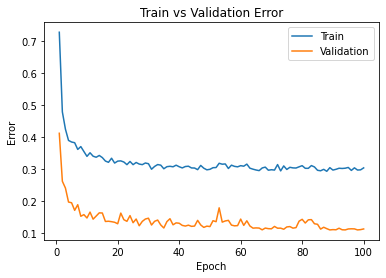

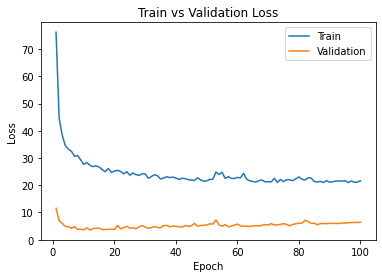

In [ ]:
plot_training_curve(get_model_name(tNetDp.name, 500, 0.001, 99))

In [ ]:
# evaluate performance class by class
train_loader, valid_loader, test_loader = feature_loader(feature_root_path, 0.6, 0.2, batch_size = 1)
# load the data first
# the data had been previously copied into the workspace as small set
model = tNetDp
correct = 0
total = 0
correct_by_class = [0 for i in range(0, 27)]
total_per_class = [0 for i in range(0, 27)]
loader = valid_loader
model.eval()
with torch.no_grad():
  for i, data in enumerate(loader, 0):
    feature, labels = data

    output = model(feature)


    # select index with maximum prediction score
    pred = output.max(1, keepdim = True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    correct_by_class[labels] = correct_by_class[labels]\
                                + pred.eq(labels.view_as(pred)).sum().item()
    total += feature.shape[0]
    total_per_class[labels] += 1
print(correct_by_class)
print(total_per_class)
for i in range(0, 27):
  print("Class {}: {} out of {}, {}".format(classes[i], correct_by_class[i], 
                                            total_per_class[i],
                                            correct_by_class[i]/total_per_class[i]))
print(total)

[157, 144, 144, 157, 127, 140, 152, 153, 140, 150, 141, 157, 163, 150, 166, 146, 168, 170, 161, 157, 162, 163, 150, 142, 155, 144, 178]
[164, 158, 146, 165, 141, 152, 159, 156, 154, 150, 144, 161, 173, 152, 176, 153, 169, 171, 161, 162, 175, 164, 153, 165, 155, 163, 178]
Class 11211: 157 out of 164, 0.9573170731707317
Class 15571: 144 out of 158, 0.9113924050632911
Class 22388: 144 out of 146, 0.9863013698630136
Class 2456: 157 out of 165, 0.9515151515151515
Class 3007: 127 out of 141, 0.900709219858156
Class 3008: 140 out of 152, 0.9210526315789473
Class 3009: 152 out of 159, 0.9559748427672956
Class 30136: 153 out of 156, 0.9807692307692307
Class 3044c: 140 out of 154, 0.9090909090909091
Class 3062b: 150 out of 150, 1.0
Class 35464: 141 out of 144, 0.9791666666666666
Class 3660: 157 out of 161, 0.9751552795031055
Class 3665: 163 out of 173, 0.9421965317919075
Class 3941: 150 out of 152, 0.9868421052631579
Class 4070: 166 out of 176, 0.9431818181818182
Class 42023: 146 out of 153, 0.9

IndexError: ignored

In [ ]:
correct = 0
total = 0
correct_by_class = [0 for i in range(0, 27)]
total_per_class = [0 for i in range(0, 27)]
loader = test_loader
model.eval()
with torch.no_grad():
  for i, data in enumerate(loader, 0):
    feature, labels = data

    output = model(feature)


    # select index with maximum prediction score
    pred = output.max(1, keepdim = True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    correct_by_class[labels] = correct_by_class[labels]\
                                + pred.eq(labels.view_as(pred)).sum().item()
    total += feature.shape[0]
    total_per_class[labels] += 1
print(correct_by_class)
print(total_per_class)
for i in range(0, 27):
  print("Class {}: {} out of {}, {}".format(classes[i], correct_by_class[i], 
                                            total_per_class[i],
                                            correct_by_class[i]/total_per_class[i]))
print(total)

[155, 136, 160, 141, 154, 153, 159, 149, 161, 141, 163, 155, 160, 170, 156, 162, 167, 151, 155, 137, 140, 167, 163, 154, 145, 143, 147]
[161, 148, 163, 144, 163, 166, 169, 151, 171, 141, 172, 157, 170, 170, 169, 169, 167, 151, 156, 143, 161, 170, 167, 171, 145, 158, 147]
Class 11211: 155 out of 161, 0.9627329192546584
Class 15571: 136 out of 148, 0.918918918918919
Class 22388: 160 out of 163, 0.9815950920245399
Class 2456: 141 out of 144, 0.9791666666666666
Class 3007: 154 out of 163, 0.9447852760736196
Class 3008: 153 out of 166, 0.9216867469879518
Class 3009: 159 out of 169, 0.9408284023668639
Class 30136: 149 out of 151, 0.9867549668874173
Class 3044c: 161 out of 171, 0.9415204678362573
Class 3062b: 141 out of 141, 1.0
Class 35464: 163 out of 172, 0.9476744186046512
Class 3660: 155 out of 157, 0.9872611464968153
Class 3665: 160 out of 170, 0.9411764705882353
Class 3941: 170 out of 170, 1.0
Class 4070: 156 out of 169, 0.9230769230769231
Class 42023: 162 out of 169, 0.9585798816568047

# complete Berend data set

In [16]:
#Training with larger batch size
use_cuda = True
tNetDp = TransferLearningNetDp3(0.3).cuda()
transfer_train(tNetDp, batch_size=500, num_epochs=100, lr=0.001)

Epoch 0 Finished.  Time per Epoch:   5.43 s 
train err: 0.6957, train loss: 93.7148
validation err: 0.3932, validation loss: 14.2101
Epoch 1 Finished.  Time per Epoch:   5.78 s 
train err: 0.4670, train loss: 57.1220
validation err: 0.2486, validation loss: 9.3224
Epoch 2 Finished.  Time per Epoch:   5.81 s 
train err: 0.4116, train loss: 49.1079
validation err: 0.2046, validation loss: 7.1688
Epoch 3 Finished.  Time per Epoch:   5.81 s 
train err: 0.3876, train loss: 45.3351
validation err: 0.1902, validation loss: 6.4317
Epoch 4 Finished.  Time per Epoch:   5.83 s 
train err: 0.3666, train loss: 42.7604
validation err: 0.1952, validation loss: 6.5425
Epoch 5 Finished.  Time per Epoch:   5.84 s 
train err: 0.3545, train loss: 40.8584
validation err: 0.1593, validation loss: 5.4662
Epoch 6 Finished.  Time per Epoch:   5.84 s 
train err: 0.3516, train loss: 40.1975
validation err: 0.1475, validation loss: 4.9391
Epoch 7 Finished.  Time per Epoch:   5.84 s 
train err: 0.3325, train loss:

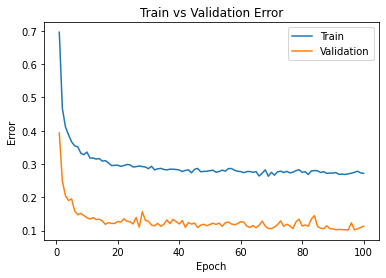

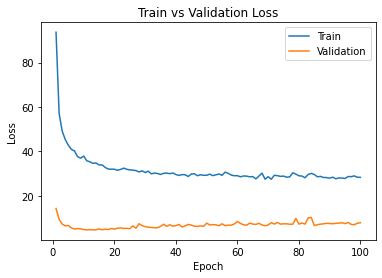

In [17]:
plot_training_curve(get_model_name(tNetDp.name, 500, 0.001, 99))